In [184]:
import pandas as pd
import matplotlib.pyplot as plt

In [185]:
df1 = pd.read_csv('../data/trash-amounts-tourist.csv', dtype={'Year': str, 'Month': str})
df1['Tonnage'] = pd.to_numeric(df1['Tonnage'].str.replace(',', '.'))
df1.head()

,Month,CW,Year,Date,Yard,Shift,Tour,Tonnage,Type,Tour_Arrivals,Tour_Stays,Avg_Daily_Arrivals,Avg_Daily_Stays
0,1,1,2019,02.01.19,VMF,1,1,5.59,BIO,914931.0,2159841.0,29514.0,69672.0
1,1,1,2019,02.01.19,VMF,1,4,3.23,BIO,914931.0,2159841.0,29514.0,69672.0
2,1,1,2019,02.01.19,VMF,1,5,5.68,BIO,914931.0,2159841.0,29514.0,69672.0
3,1,1,2019,02.01.19,VMF,1,6,5.48,BIO,914931.0,2159841.0,29514.0,69672.0
4,1,1,2019,02.01.19,VMF,1,7,7.84,BIO,914931.0,2159841.0,29514.0,69672.0


In [186]:
df2 = pd.read_csv('../data/umsatz-gastgewerbe.csv', delimiter=';', skiprows=7, usecols=[1, 2, 3], names=['Year', 'Month', 'Hosp_Sales',], dtype={'Year': str, 'Month': str})
df2['Year'] = df2['Year'].ffill()
df2['Hosp_Sales'] = pd.to_numeric(df2['Hosp_Sales'].str.replace(',', '.'))

month_mapping = {
    'Januar': '1', 'Februar': '2', 'März': '3',
    'April': '4', 'Mai': '5', 'Juni': '6', 'Juli': '7',
    'August': '8', 'September': '9', 'Oktober': '10',
    'November': '11', 'Dezember': '12'
}

df2['Month'] = df2['Month'].map(month_mapping)

df2.head()

,Year,Month,Hosp_Sales
0,2019,1,86.3
1,2019,2,92.4
2,2019,3,103.5
3,2019,4,99.9
4,2019,5,111.1


In [187]:
df_merged = pd.merge(df1, df2, on=['Month', 'Year'], how='left')
df_merged.head()

,Month,CW,Year,Date,Yard,Shift,Tour,Tonnage,Type,Tour_Arrivals,Tour_Stays,Avg_Daily_Arrivals,Avg_Daily_Stays,Hosp_Sales
0,1,1,2019,02.01.19,VMF,1,1,5.59,BIO,914931.0,2159841.0,29514.0,69672.0,86.3
1,1,1,2019,02.01.19,VMF,1,4,3.23,BIO,914931.0,2159841.0,29514.0,69672.0,86.3
2,1,1,2019,02.01.19,VMF,1,5,5.68,BIO,914931.0,2159841.0,29514.0,69672.0,86.3
3,1,1,2019,02.01.19,VMF,1,6,5.48,BIO,914931.0,2159841.0,29514.0,69672.0,86.3
4,1,1,2019,02.01.19,VMF,1,7,7.84,BIO,914931.0,2159841.0,29514.0,69672.0,86.3


In [188]:
df_merged = df_merged.groupby(['Year', 'Month', 'Tour_Arrivals','Hosp_Sales'])['Tonnage'].mean().reset_index()
df_merged.head(70)

,Year,Month,Tour_Arrivals,Hosp_Sales,Tonnage
0,2019,1,914931.0,86.3,13.151029
1,2019,10,1273608.0,112.0,12.763866
2,2019,11,1178897.0,110.8,12.533176
3,2019,12,1072665.0,106.2,12.479744
4,2019,2,949002.0,92.4,13.233680
5,2019,3,1110954.0,103.5,13.279736
6,2019,4,1184986.0,99.9,13.325477
7,2019,5,1277674.0,111.1,12.855768
8,2019,6,1244717.0,109.4,12.845920
9,2019,7,1225219.0,96.7,11.950636


In [189]:
df_merged['Month'] = pd.to_numeric(df_merged['Month'])
df_merged = df_merged.sort_values(by=['Year', 'Month'])
df_merged.head(70)

,Year,Month,Tour_Arrivals,Hosp_Sales,Tonnage
0,2019,1,914931.0,86.3,13.151029
4,2019,2,949002.0,92.4,13.233680
5,2019,3,1110954.0,103.5,13.279736
6,2019,4,1184986.0,99.9,13.325477
7,2019,5,1277674.0,111.1,12.855768
8,2019,6,1244717.0,109.4,12.845920
9,2019,7,1225219.0,96.7,11.950636
10,2019,8,1274832.0,103.6,12.461339
11,2019,9,1255860.0,118.5,12.422663
1,2019,10,1273608.0,112.0,12.763866


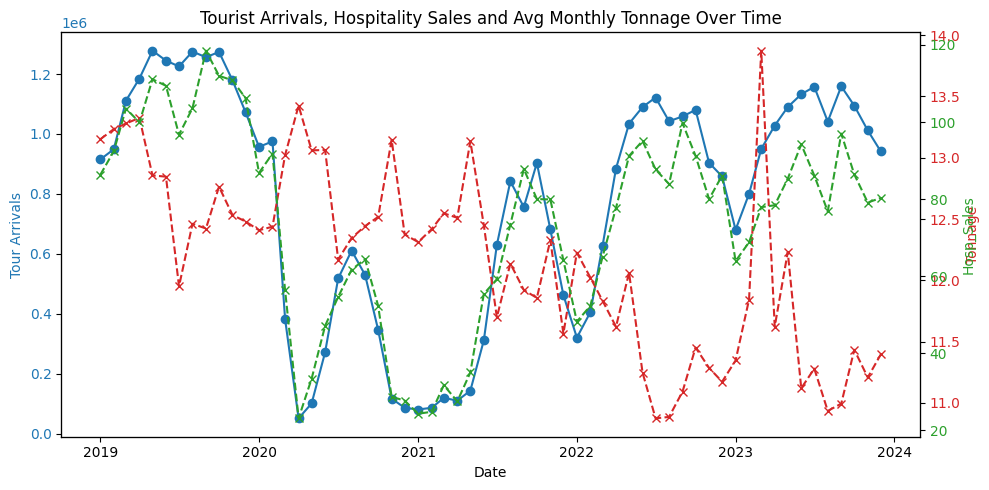

In [190]:
# Combine year and month into a single column for the x-axis
df_merged['Date'] = pd.to_datetime(df_merged[['Year', 'Month']].assign(Day=1))  # Assume day 1 for plotting

# Create the plot
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot Tour_Arrivals on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Tour Arrivals', color='tab:blue')
ax1.plot(df_merged['Date'], df_merged['Tour_Arrivals'], color='tab:blue', marker='o', label='Tour Arrivals')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis to plot Tonnage
ax2 = ax1.twinx()
ax2.set_ylabel('Tonnage', color='tab:red')
ax2.plot(df_merged['Date'], df_merged['Tonnage'], color='tab:red', marker='x', linestyle='--', label='Tonnage')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Create a secondary y-axis to plot Tonnage
ax3 = ax1.twinx()
ax3.set_ylabel('Hosp_Sales', color='tab:green')
ax3.plot(df_merged['Date'], df_merged['Hosp_Sales'], color='tab:green', marker='x', linestyle='--', label='Hosp_Sales')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Set title and show plot
plt.title('Tourist Arrivals, Hospitality Sales and Avg Monthly Tonnage Over Time')
fig.tight_layout()
plt.show()


In [197]:
corr_matrix = df_merged[['Tour_Arrivals', 'Hosp_Sales', 'Tonnage']].corr()
print(corr_matrix)

               Tour_Arrivals  Hosp_Sales   Tonnage
Tour_Arrivals       1.000000    0.963092 -0.325953
Hosp_Sales          0.963092    1.000000 -0.221741
Tonnage            -0.325953   -0.221741  1.000000


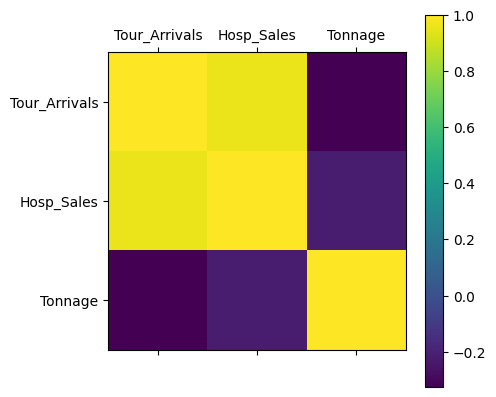

In [198]:
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()